# Chapter 5. 통계

### 5.1 데이터셋 설명하기

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
from typing import List
import numpy as np


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/DNM/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mean', 'quantile', 'median']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


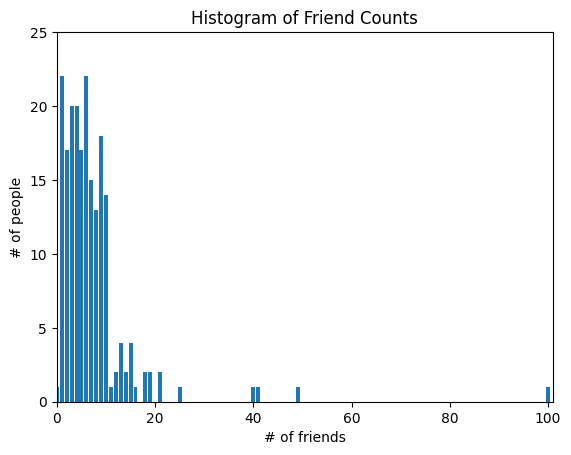

In [10]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,0,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4
               ,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1
               ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

%pylab inline

make_friend_counts_histogram(plt)

In [11]:
# 중앙값
# 밑줄(_) 함수는 프라이빗 함수, 사람이 직접 호출하는것이 아닌 median 함수에 불러오게 설계
def _median_odd(xs : List[float]) -> float:

    return sorted(xs)[len(xs) // 2] # len(xs)가 홀수면 중앙값 반환

In [12]:
_median_odd(num_friends)

6

In [13]:
def _median_even(xs : List[float]) -> float:
    sorted_xs = sorted(xs) # 중앙값을 찾기 위해 정렬
    hi_midpoint = len(xs) // 2 # 중앙값 정의

    return (sorted_xs[hi_midpoint -1] + sorted_xs[hi_midpoint]) /2 # 중앙값이 두개로 두개를 더해서 평균을 구해줌.

In [14]:
_median_even(num_friends)

6.0

In [ ]:
def median(v : List[float]) -> float:

    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v) # len에 따라 홀수, 짝수 프라이빗 함수를 불러옴.

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [16]:
# 분위
def quantile(xs : List[float], p: float) -> float:
    p_index = int(p * len(xs)) # x의 p분위값의 인덱스

    return sorted(xs)[p_index] # 정렬을 해주고 p분위값의 인덱스 값 반환

for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(num_friends, i * 0.01))

0.00 Percentage value 0
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


In [17]:
np.percentile(num_friends, [i for i in range(0,100,25)])

array([0., 3., 6., 9.])

In [ ]:
# 평균
def mean(x):
    return sum(x) / len(x)

In [18]:
mean(num_friends)

7.284313725490196

In [ ]:
# 최빈값
def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values()) # 최빈값이 한개 이상일 수 있기 때문에 개수 확인

    return [x_i for x_i, count in counts.items() if count == max_count] # 최빈값 리스트로 반환

In [19]:
mode(num_friends)

[6, 1]

In [20]:
# 범위
def data_range(xs : List[float]) -> float:

    return max(xs) - min(xs) # 가장 큰 값과 작은 값을 빼줘 범위를 알아냄.

In [21]:
data_range(num_friends)

100

In [ ]:
# 분산
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    
    return [x - x_bar for x in xs] # 평균을 0으로 만들기 위해 모든 데이터에서 평균을 빼줌.

def variance(xs : List[float]) -> float:
    assert len(xs) >= 2, "variance requires at least two elements" # 분산을 구하기 위해서는 최소 원소 2개 이상 필요

    n = len(xs)
    deviations = de_mean(xs)

    return sum(deviations) / (n-1) 
# n-1로 나누는 이유 : 편차의 제곱 합을 n으로 나누면 bias 때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는것을 보정하기 위함.

In [22]:
variance(num_friends)

5.600336833577144e-16

In [ ]:
import math

# 표준 편차
def standard_deviation(xs: List[float]) -> float:

    return math.sqrt(variance(xs)) # 표준 편차는 분산의 제곱

# 상위 25%, 하위 25%
def interquartile_range(xs : List[float]) -> float:

    return quantile(xs, 0.75) - quantile(xs, 0.25) # 상위 25% - 하위 25%

In [23]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36,
                48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,
                73.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,
                40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72
                ,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61
                ,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62
                ,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48
                ,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35
                ,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44
                ,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### 5.2 상관관계

In [24]:
# ch.4에서 만든 벡터의 곱셈 
def vector_dot(v, w):

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [26]:
# 공분산 : 2개의 확률변수의 선형 관계를 나타내는 값
# 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 선형 상관성이 있다면 양수의 공분산을 가짐. 
# 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값이 하강하는 선형 상관성을 보인다면 공분산의 값은 음수가 됨.

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return vector_dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [27]:
covariance(num_friends, daily_minutes)

/var/folders/fl/hl6f7wqx5d37g1mkvl1dgt400000gn/T/ipykernel_68712/1424243239.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(v_i * w_i for v_i, w_i in zip(v, w))


23.218215010141986

In [28]:
def correlation(xs : List[float], ys : List[float]) -> float:
    # xs, ys가 각각 평균에서 얼마나 떨어져 있는지 계산 
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # 편차가 존재하지 않으면 상관관계는 0
    
    assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
    assert 0.24 < correlation(num_friends, daily_minutes) < 0.25

# 상관관계는 단위가 존재하지 않으며, 항상 -1(완벽한 음의 상관관계) ~ 1(완벽한 양의 상관관계) 사이의 값임.

In [29]:
correlation(num_friends, daily_minutes)

/var/folders/fl/hl6f7wqx5d37g1mkvl1dgt400000gn/T/ipykernel_68712/1424243239.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(v_i * w_i for v_i, w_i in zip(v, w))


2.931566041221854e+16

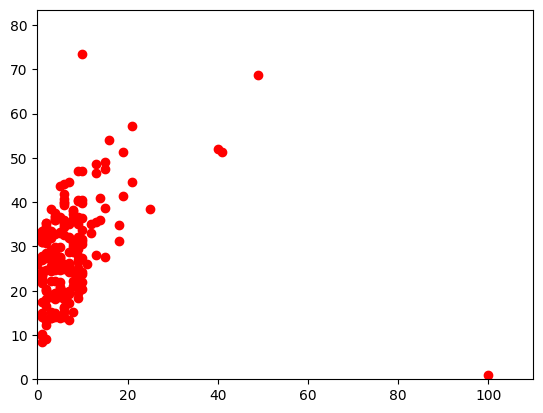

In [30]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

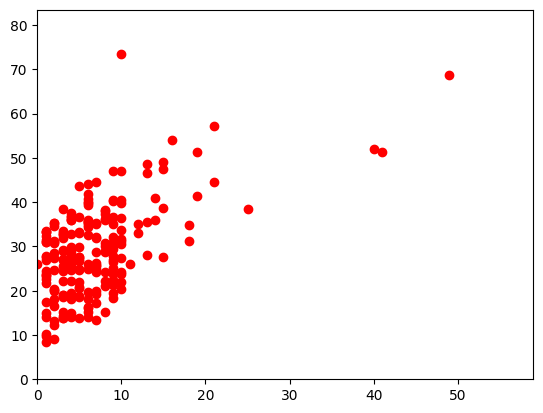

In [31]:
outlier = num_friends.index(100) # 이상치 인덱스

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()

### 5.3 심슨의 역설 : confounding variables이 누락되어 상관관계가 잘못 계산되는 역설

#### confounding variable : 연구나 실험에서 독립 변수와 종속 변수 간의 인과 관계를 왜곡시키는 요인으로, 연구자의 통제 밖에 있는 변수로서, 연구 대상에 영향을 미치지만 연구의 목적과는 직접적으로 관련되어 있지 않은 요인!
